## Problem Metadata 
DO NOT DELETE (JSON Block; the metadata and course context MUST be in the first cell)

```json
{
    "problem_title": "isochoricCoolingIdealGas",
    "author": "tschutzius",
    "year": "Fa25",
    "difficulty_tags": ["easy"],
    "topic": "Properties",
    "lecture_reference": {
        "lecture_id": "1_h0h8llrr",
        "subtopics": [
            {
              "key": "Fa25-L2b-7.0",
              "title": "Isochoric cooling example",
            }
        ]
    },
    "book_reference": {
        "chapter_number": 2,
        "title": "Energy, Energy Transfer, and General Energy Analysis",
        "sections": [
            "Energy Transfer by Heat",
        ]
    },
    "notes": ""
}
```

## 1. Problem Statement
1 kg of air, treated as an ideal gas, is kept inside a rigid container. The initial pressure and temperature are 100 kPa and 100 deg. C. It is then cooled until it reaches 80 kPa. 

**Goal**
- What is the final temperature?
- How much heat is transferred out?

## 2. Schematic
Draw a rigid container that contains an ideal gas. Draw a control volume along the boundary of the container. Show that heat is being transferred out.

## 3. Assumptions and Approximations
* **Closed system** (no mass in or out).
* **Neglect changes in kinetic and potential energy**: $\Delta KE\approx0$, $\Delta PE\approx0$. (Justification: The velocities are typically low, or the change in height is negligible compared to the enthalpy change.)
* **Heat** is transferred out.
* **Ideal Gas Model** (Justification: Air at these conditions behaves as an ideal gas, $p v = R T$)
* **Internal Energy Ideal Gas** Internal energy for an ideal gas only depend upon temperature, $U = U(T)$. 
* **Isochoric** $v_2 = v_1$ (Justification: rigid container, closed system)

## 4. Physical Laws and Governing Equations
Conservation of energy:
$$\Delta E_\text{system} = E_\text{in} - E_\text{out} = (W_\text{in} + Q_\text{in}) - (W_\text{out} + Q_\text{out})$$

By definition we can write that the changes in the energyof the system only depend on changes in internal energy, kinetic energy, and potential energy. 

$$\Delta E_\text{system} = \Delta U + \Delta KE + \Delta PE $$

Neglect kinetic and potential energy changes:

$$\Delta E_\text{system} = \Delta U $$

$$\Delta U = U_2 - U_1 = (Q_\text{in} - Q_\text{out}) + (W_\text{in} - W_\text{out}) $$

The vessel is cooled at constant volume. Therefore, no work transfer:

$$\Delta U = (Q_\text{in} - Q_\text{out})$$

Heat is only transferred out:

$$\Delta U = U_2 - U_1 =  - Q_\text{out}$$

We will show this later, but for an ideal gas, the change in internal energy only depends upon temperature, and the specific heat at constant volume, $c_V$ therefore:

$$dU = m c_V dT $$

Therefore,

$$U_2 - U_1 = m c_V (T_2 - T_1) $$ 

Substituting into above yields:

$$U_2 - U_1 =  - Q_\text{out} = m c_V (T_2 - T_1)$$

Rearranging:

$$ Q_\text{out} = m c_V (T_1 - T_2)$$

In [7]:
## 5. Properties (Code Cell)
!pip install pyCalor numpy
from pyCalor import thermo as th
import matplotlib.pyplot as plt

m_kg = 1
R_JperKgPerK = 287

p1_Pa = 100e3
T1_C = 100

p2_Pa = 80e3
# T2_C = 25

# ideal gas law
v1_m3PerKg = (R_JperKgPerK*(T1_C+273.15))/p1_Pa

# isochoric
v2_m3PerKg = v1_m3PerKg

# ideal gas to determine T2
T2_K = (p2_Pa*v2_m3PerKg)/R_JperKgPerK
T2_C = T2_K - 273.15

(a) T2_C = 25.370 C.
(b) Qout_kJ = 53.584 kJ.


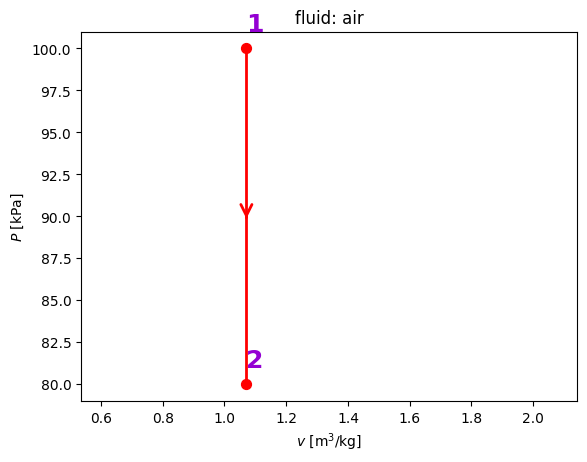

In [6]:
# 6 Calculations (Code Cell)
print('(a) T2_C = {0:1.3f} C.'.format(T2_C))

cv_kJperKgPerK = 0.718
Qout_kJ = m_kg*cv_kJperKgPerK*(T1_C - T2_C)
print('(b) Qout_kJ = {0:1.3f} kJ.'.format(Qout_kJ))

st1 = th.state('air', p=p1_Pa/1000, T=T1_C+273.15, name="1")
st2 = th.state('air', p=p2_Pa/1000, T=T2_C+273.15, name="2")
pr = th.process([(st1,st2)])

#plot the process on a p-v diagram
fig1 = pr.plot("pv")

## 7. Summary and Reasoning

The pressure-volume diagram makes sense. Pressure decreases while volume is kept the same. We expected the pressure to decrease since we are transferring energy out. As volume is kept constant, there is no work transfer.

THIS SHOULD BE THE FINAL CELL, DO NOT ADD OTHERS AFTER THIS, EVEN IF THEY'RE EMPTY
--- End of the Jupyter Notebook ---